In [1]:
# Outlier detection and removal using Percentile Method

import numpy as np
import pandas as pd

In [33]:
df = pd.read_csv('Adm_data.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [35]:
df.shape

(400, 9)

In [37]:
df['CGPA'].describe()

count    400.000000
mean       8.598925
std        0.596317
min        6.800000
25%        8.170000
50%        8.610000
75%        9.062500
max        9.920000
Name: CGPA, dtype: float64

C:\Users\Sikandar\AppData\Local\Temp\ipykernel_10516\2435499987.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'])


<Axes: xlabel='CGPA', ylabel='Density'>

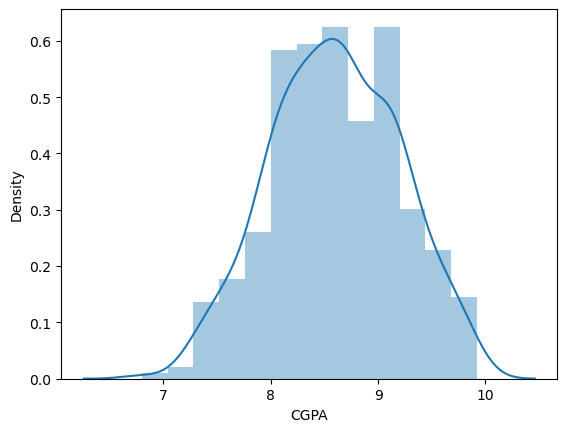

In [39]:
import seaborn as sns

sns.distplot(df['CGPA'])

<Axes: ylabel='CGPA'>

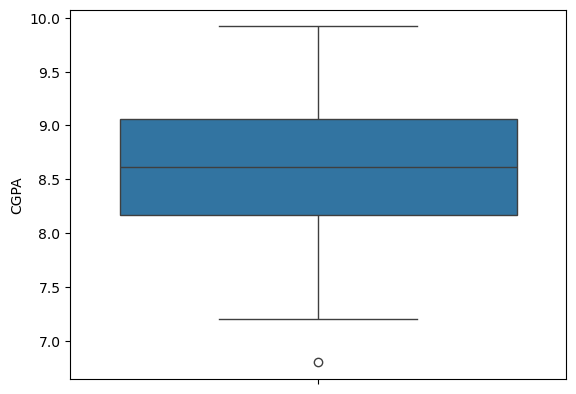

In [41]:
sns.boxplot(df['CGPA'])

In [43]:
# upper threshold 
upper_limit = df['CGPA'].quantile(0.99)
# lower threshold
lower_limit = df['CGPA'].quantile(0.01)
upper_limit,lower_limit

(9.8002, 7.299799999999999)

In [45]:
new_df = df[(df['CGPA'] <= 9.80) & (df['CGPA'] >= 7.29)]

new_df['CGPA'].describe()

count    392.000000
mean       8.600816
std        0.568926
min        7.300000
25%        8.180000
50%        8.610000
75%        9.052500
max        9.800000
Name: CGPA, dtype: float64

In [47]:
df['CGPA'].describe()

count    400.000000
mean       8.598925
std        0.596317
min        6.800000
25%        8.170000
50%        8.610000
75%        9.062500
max        9.920000
Name: CGPA, dtype: float64

C:\Users\Sikandar\AppData\Local\Temp\ipykernel_10516\1780618055.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['CGPA'])


<Axes: xlabel='CGPA', ylabel='Density'>

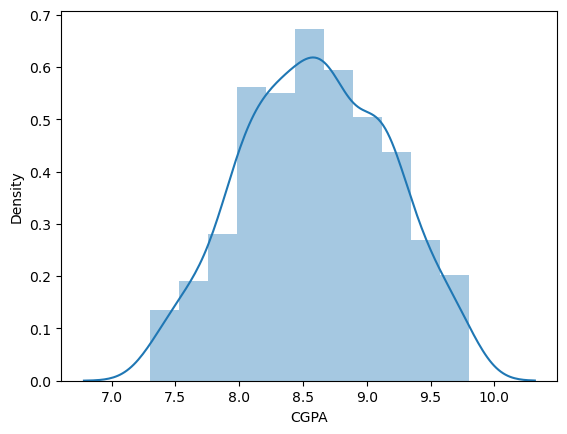

In [49]:
sns.distplot(new_df['CGPA'])

<Axes: ylabel='CGPA'>

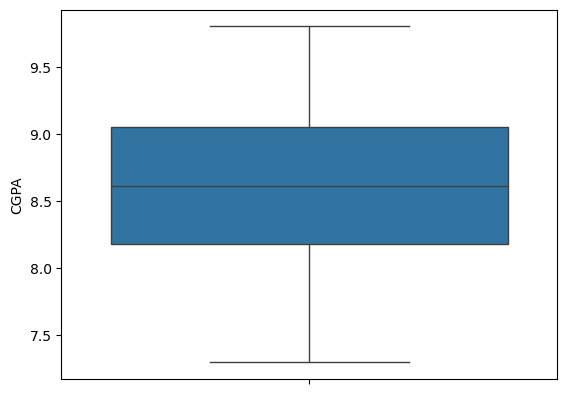

In [51]:
sns.boxplot(new_df['CGPA'])

In [53]:
# Capping --> (called Winsorization in Percentile)
df['CGPA'] = np.where(df['CGPA'] >= upper_limit,
        upper_limit,
        np.where(df['CGPA'] <= lower_limit,
        lower_limit,
        df['CGPA']))

df.shape

(400, 9)

In [55]:
df['CGPA'].describe()

count    400.000000
mean       8.599800
std        0.590403
min        7.299800
25%        8.170000
50%        8.610000
75%        9.062500
max        9.800200
Name: CGPA, dtype: float64

C:\Users\Sikandar\AppData\Local\Temp\ipykernel_10516\3833812877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CGPA'])


<Axes: xlabel='CGPA', ylabel='Density'>

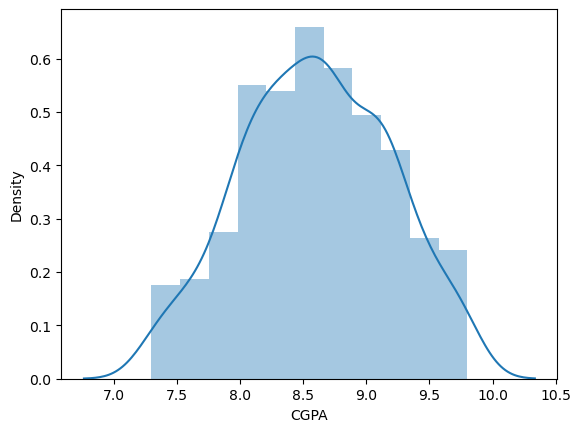

In [57]:
sns.distplot(df['CGPA'])

<Axes: ylabel='CGPA'>

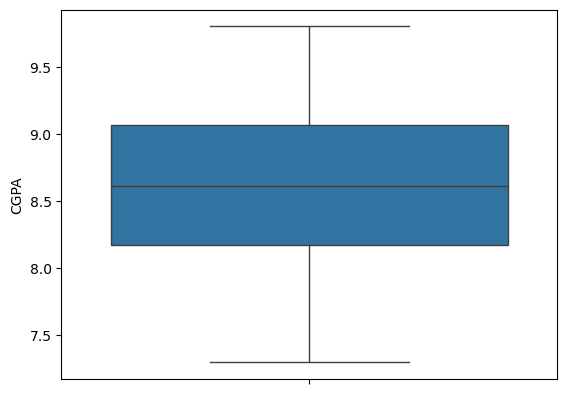

In [59]:
sns.boxplot(df['CGPA'])